# 

# Turnover test toegepast op directie

Periode  | Directeurs
------------- | -------------
1893 - 1898  | Edward Keurvels & Henry Fontaine
1898 - 1902  | Karel van Walle
1902 - 1909  | Jef Judels en Bernard Tokkie
1909 - 1922  | Henry Fontaine (gesloten tijdens WOI)
1922 - 1923  | Flor Alpaerts & Arthur Steurbout
1923 - 1932  | Fé Derickx & Bernard Tokkie
1923 - 1934  | Flor Bosmans


## Veranderingen in populaire producties (top 10)

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv", encoding='latin-1', index_col=False)
df = df.set_index('Directie')

In [88]:
def df2ranking(df, rank_col='Directie', cutoff=10):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Genormaliseerde titel'][:cutoff] #Genormaliseerde titel

In [89]:
productie_ranks = []
for directie in df.index.unique():
    directie_df = df.loc[directie]
    ranking = df2ranking(directie_df)
    ranking.name = directie
    productie_ranks.append(ranking)

productie_ranks = pd.DataFrame(productie_ranks)

In [90]:
def turnover(df):
    """Compute the 'turnover' for popularity rankings."""
    df = df.apply(set, axis=1)
    return (df.iloc[1:] - df.shift(1).iloc[1:]).apply(len)

In [91]:
directie = turnover(productie_ranks)

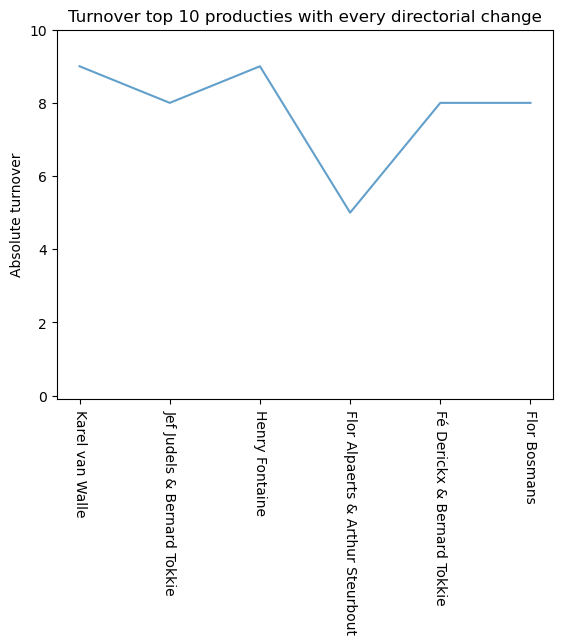

In [92]:
ax = directie.plot(
    style='-', ylim=(-0.1, 10.0), alpha=0.7,
    title='Turnover top 10 producties with every directorial change')
plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");

#grote variate. Bijna de gehele top 10 wijzigt per directorial change

# Verandering in genres (top 10)

In [77]:
def df2ranking(df, rank_col='Directie', cutoff=10):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['genre'][:cutoff]

In [78]:
genre_ranks = []
for directie in df.index.unique():
    directie_df = df.loc[directie]
    ranking = df2ranking(directie_df)
    ranking.name = directie
    genre_ranks.append(ranking)

genre_ranks = pd.DataFrame(genre_ranks)

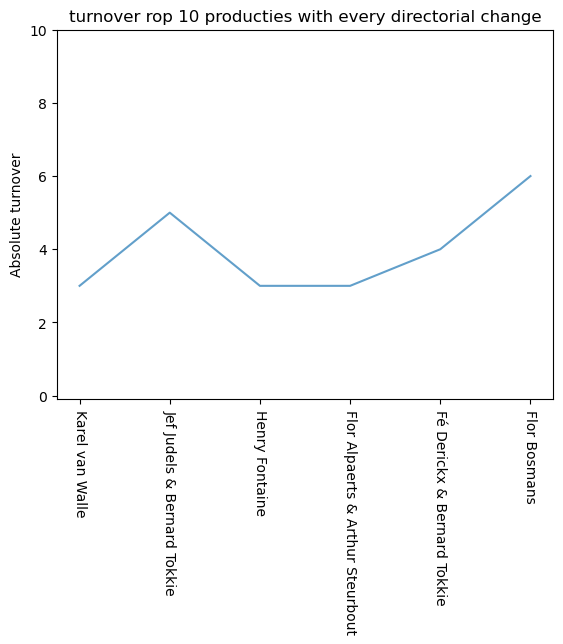

In [80]:
genre = turnover(genre_ranks)

ax = genre.plot(
    style='-', ylim=(-0.1, 10.0), alpha=0.7,
    title='turnover rop 10 producties with every directorial change'
)
plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");

## Verandering in oorspronkelijke taal (top 5)

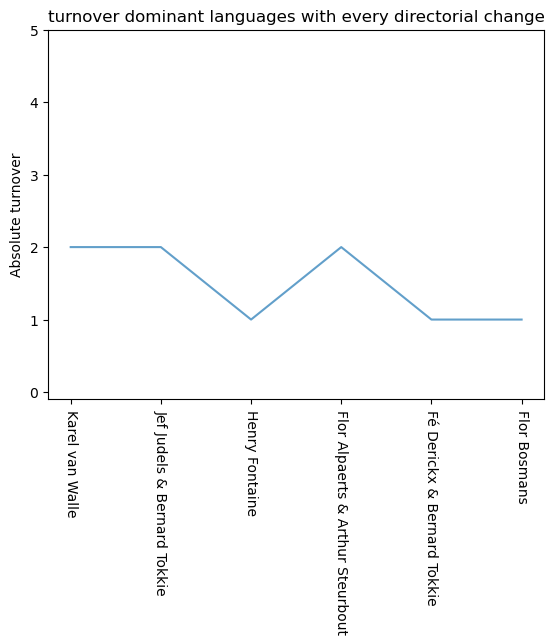

In [84]:
def df2ranking(df, rank_col='Directie', cutoff=5):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Oorspronkelijke taal'][:cutoff]

taal_ranks = []
for directie in df.index.unique():
    directie_df = df.loc[directie]
    ranking = df2ranking(directie_df)
    ranking.name = directie
    taal_ranks.append(ranking)

taal_ranks = pd.DataFrame(taal_ranks)

taal = turnover(taal_ranks)

ax = taal.plot(
    style='-', ylim=(-0.1, 5), alpha=0.7,
    title='turnover dominant languages with every directorial change'
)
plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");

